<a href="https://colab.research.google.com/github/Leoparh/TP-ML/blob/main/TPMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

import seaborn as sns
 
uploaded = files.upload()


Saving stress_classification.csv to stress_classification (3).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import io
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve

#Arbre de decision
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO


from IPython.display import Image  
import pydotplus



In [ ]:
df = pd.read_csv('stress_classification.csv', delimiter=';')

In [ ]:
df.head()

,snoring_range,respiration_rate,body_temperature,limb_movement_rate,blood_oxygen_levels,rapid_eye_movement,hour_of_sleep,heart_rate,stress_level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [ ]:
model=KNeighborsClassifier(n_neighbors=8)

X = df.drop('stress_level', axis=1)
y = df['stress_level']
print(y)

0      3
1      3
2      1
3      3
4      0
      ..
625    2
626    0
627    4
628    1
629    2
Name: stress_level, Length: 630, dtype: int64


In [ ]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.7,random_state=1)

In [ ]:
model.fit(x_train,y_train)
model.score(X,y)

1.0

In [ ]:
#Setup Ypred et Ytrue pour les calculs de précision et les matrices
y_pred = model.predict(x_test)
y_true=y_test

In [ ]:
#confusion matrix

cm= confusion_matrix(y_true, y_pred)

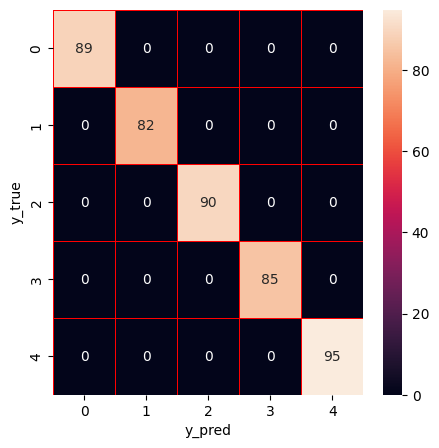

In [ ]:
#cm vizualization
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
rcs = recall_score(y_test, y_pred, average='macro')
print('RECALL SCORE : ', rcs)

RECALL SCORE :  1.0


In [ ]:
precision = precision_score(y_true, y_pred, average='macro')
print('PRECISION : ', precision)

PRECISION :  1.0


In [ ]:
F1s = 2 * (precision * rcs) / (precision + rcs)
print('F1 SCORE : ', F1s)

F1 SCORE :  1.0


In [ ]:
model.predict(X)

array([3, 3, 1, 3, 0, 1, 0, 0, 0, 1, 2, 1, 0, 4, 3, 1, 1, 3, 3, 2, 2, 2,
       2, 3, 3, 1, 2, 1, 3, 2, 0, 4, 0, 4, 2, 3, 0, 4, 0, 4, 2, 2, 2, 0,
       2, 4, 2, 4, 1, 4, 0, 1, 3, 0, 1, 2, 4, 3, 3, 1, 4, 3, 0, 2, 4, 1,
       0, 2, 4, 0, 1, 4, 1, 0, 0, 4, 4, 1, 3, 4, 1, 1, 1, 4, 2, 1, 1, 1,
       3, 4, 2, 3, 2, 4, 0, 2, 4, 2, 2, 3, 4, 4, 0, 4, 1, 2, 2, 2, 4, 1,
       2, 4, 0, 3, 2, 4, 2, 2, 0, 1, 1, 3, 4, 1, 3, 4, 4, 2, 1, 4, 2, 0,
       4, 3, 1, 0, 0, 2, 4, 0, 2, 3, 2, 0, 2, 0, 0, 0, 0, 1, 3, 0, 4, 4,
       0, 2, 3, 2, 4, 4, 4, 2, 1, 2, 4, 2, 0, 0, 4, 4, 1, 2, 2, 1, 1, 1,
       1, 4, 3, 1, 1, 1, 2, 1, 0, 2, 0, 2, 1, 2, 1, 1, 4, 3, 4, 0, 0, 0,
       2, 3, 0, 0, 0, 2, 4, 0, 2, 4, 1, 1, 1, 3, 0, 0, 3, 3, 0, 2, 2, 2,
       1, 4, 0, 1, 3, 4, 2, 1, 4, 0, 3, 4, 1, 3, 0, 0, 3, 4, 3, 1, 4, 3,
       3, 4, 3, 0, 3, 2, 3, 3, 1, 4, 2, 3, 1, 3, 2, 3, 4, 2, 4, 3, 2, 0,
       0, 1, 2, 3, 2, 2, 4, 4, 1, 0, 4, 1, 2, 3, 4, 3, 3, 3, 0, 3, 0, 1,
       3, 3, 3, 2, 4, 0, 4, 0, 4, 0, 2, 1, 2, 1, 3,

In [ ]:
def stress(model,snoring_range=52.64,respiration_rate=18.528,body_temperature=94.528,limb_movement_rate=8.528,blood_oxygen_levels=92.792,rapid_eye_movement=81.32,hour_of_sleep=5.528,heart_rate=56.32):
  l = np.array([snoring_range,respiration_rate,body_temperature,limb_movement_rate,blood_oxygen_levels,rapid_eye_movement,hour_of_sleep,heart_rate]).reshape(1,8)
  print('Votre niveau de stress est : ', model.predict(l))
  print('Détail des probas par niveau de 0 à 4 : ', model.predict_proba(l))


In [ ]:
stress(model)

Votre niveau de stress est :  [1]
Détail des probas par niveau de 0 à 4 :  [[0. 1. 0. 0. 0.]]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# arbre

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9841269841269841


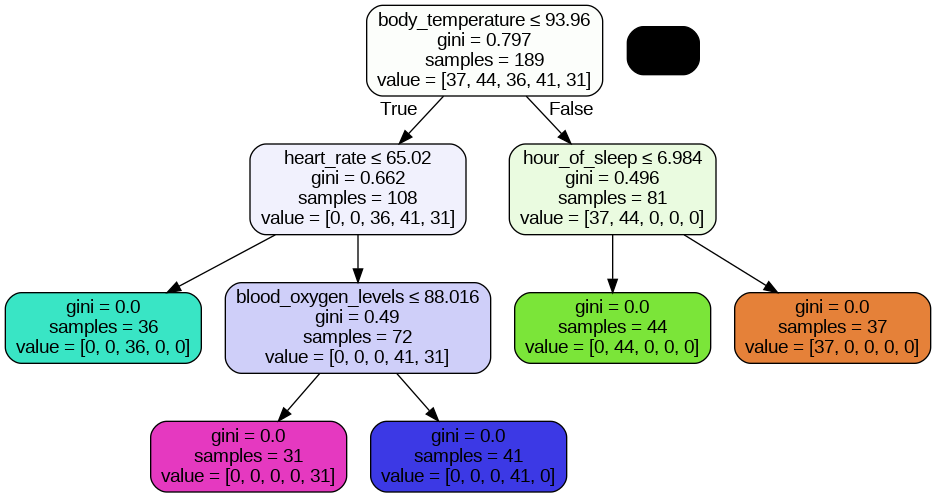

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ['snoring_range','respiration_rate','body_temperature','limb_movement_rate','blood_oxygen_levels','rapid_eye_movement','hour_of_sleep','heart_rate'],
                class_names=None)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('graph.png')
Image(graph.create_png())


In [ ]:
rcs = recall_score(y_test, y_pred, average='macro')
print('RECALL SCORE : ', rcs)

RECALL SCORE :  0.9837494021999044


In [ ]:
precision = precision_score(y_true, y_pred, average='macro')
print('PRECISION : ', precision)

PRECISION :  0.9840194193356844


In [ ]:
F1s = 2 * (precision * rcs) / (precision + rcs)
print('F1 SCORE : ', F1s)

F1 SCORE :  0.9838843922419256


In [ ]:
#confusion matrix

cm= confusion_matrix(y_true, y_pred)

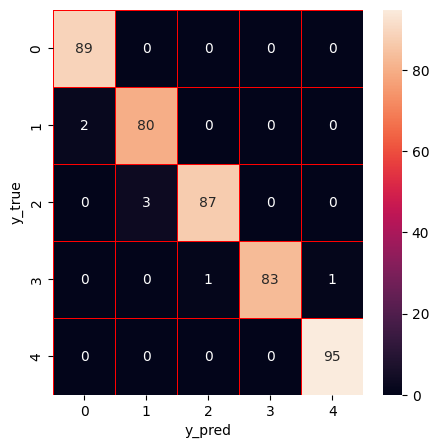

In [ ]:
#cm vizualization
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Le modèle KNN est légèrement mieux d'après les performances calculées, même si les précision et recall de 100% me paraissent un peu bizarre... 

On attteint aussi de très bonnes perf avec le tree classifier, donc les deux méthodes sont super proches en terme d'efficacité. 

Sources et datasheets : 
https://scikit-learn.org/stable/index.html

https://www.datacamp.com/tutorial/decision-tree-classification-python

https://www.kaggle.com/code/kadriyeaksakal/confusion-matrix-with-knn-algorithm

https://www.geeksforgeeks.org/ways-to-import-csv-files-in-google-colab/

https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/







*Crédit Léo AUDEBERT, Sarah CROIBIER, Arthur SALLE*